In [22]:
import pandas as pd
import numpy as np
import sklearn as sk
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
%matplotlib inline

# 1. SVM的分类

In [2]:
from sklearn.svm import SVC, LinearSVC

## SVC: support vector machine

- 在libsvm的基础上实现
- 时间复杂度： more than $O(n^2)$
- 对于大的样本量（比如多于10000个样本），难以很好的scale
- 多类分类问题，是基于 OVO（one vs one）的算法
- 可以实现不同的kernel函数

In [3]:
svc=SVC()
svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

- C : 浮点（float），默认值为1.0

\begin{align}
& J(\boldsymbol{w}) = \sum_{i=1}^m{\max(1-y_i{\boldsymbol{w}^T\boldsymbol{x}_i, 0)}}+\lambda \|\boldsymbol{w} \|^2 \\
\Rightarrow \ \ & J(\boldsymbol{w}) = C\sum_{i=1}^m{\max(1-y_i{\boldsymbol{w}^T\boldsymbol{x}_i, 0)}}+ \|\boldsymbol{w} \|^2 \\
\end{align}

    C是其他算法里正则化强度 $\lambda$ 的倒数，C越大，正则化强度越小， 容易过拟合
    
- kernel : 和函数，输入值是string,  默认值是 “rbf”（高斯），亦或是
    1. “linear”： 线性$\ \ k(x_1,x_2) = x_1^Tx_2$  
    
    2. “poly”： 多项式 $\ k(x_1,x_2) = (x_1^Tx_2 + r)^d $  
    
    3. "rbf": 高斯$\ \ \ k(x_1,x_2) = e^{-\frac{|x_1-x_2|^2}{2\sigma^2}} = e^{-\gamma (x_1-x_2)^2}$  
    
    4. ”sigmoid“$\ \ \ \ k(x_1,x_2) = tanh(\beta x_1^Tx_2 + \theta), \beta >0, \theta <0$
  
  
- decision function: “ovr“（one vs rest） or ”ovo“（one vs one）  
  针对于多类分类： 
  
  ** ovr： 会有n_samples个分类器  **  
  ** ovo： 会有n_samples(n_samples-1)/2个分类器 **

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons,make_circles,make_classification,make_blobs
from sklearn.gaussian_process.kernels import RBF
from matplotlib.colors import ListedColormap

In [5]:
make_classification?

In [31]:
X,y=make_classification(n_features=2,n_samples=200,n_informative=2,n_redundant=0,
                        n_clusters_per_class=1,random_state=1)
rng=np.random.RandomState(2018)
X+=2*rng.uniform(size=X.shape)

In [42]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

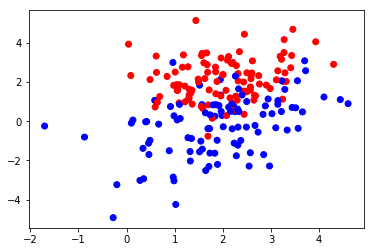

In [43]:
plt.scatter(X[:,0],X[:,1],c=y,cmap = cm_bright)

## 1.1 Linear SVM

- 尝试先用线性核的SVM来训练样本，计算precision，recall，f1等参量
- 尝试用mlxtend的plot decision boundary 画出分类器的决策边界

In [46]:
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix,roc_curve
from mlxtend.plotting import plot_decision_regions

In [56]:
C=0.1
clf=SVC(kernel='linear',C=C)

X=StandardScaler().fit_transform(X)

In [61]:
%%time
clf.fit(X,y)
y_pred=clf.predict(X)

Wall time: 1.42 ms


In [71]:
prec=precision_score(y,y_pred)
rec=recall_score(y,y_pred)
f1=f1_score(y,y_pred)
cm=confusion_matrix(y,y_pred)
print ("Precision score is : {:.2f}".format(prec))
print ("Recall score is : {:.2f}".format(rec))
print ("f1 score is : {:.2f}".format(f1))
print ("Confusion matrix is : \n{}".format(cm)) 

Precision score is : 0.88
Recall score is : 0.85
f1 score is : 0.87
Confusion matrix is : 
[[90 11]
 [15 84]]


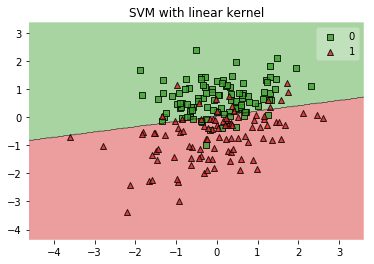

In [77]:
plot_decision_regions(X,y,clf,colors='#3ca02c,#d62728')
plt.title('SVM with linear kernel')
plt.show()

## 1.2 RBF Kernel

Precision score is : 0.85
Recall score is : 0.86
f1 score is : 0.85
Confusion matrix is : 
[[86 15]
 [14 85]]


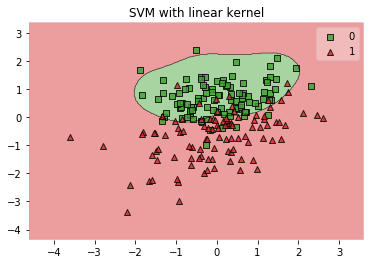

In [81]:
clf = SVC(gamma = 2., C = C)

clf.fit(X,y)
y_pred=clf.predict(X)

prec=precision_score(y,y_pred)
rec=recall_score(y,y_pred)
f1=f1_score(y,y_pred)
cm=confusion_matrix(y,y_pred)
print ("Precision score is : {:.2f}".format(prec))
print ("Recall score is : {:.2f}".format(rec))
print ("f1 score is : {:.2f}".format(f1))
print ("Confusion matrix is : \n{}".format(cm)) 

plot_decision_regions(X,y,clf,colors='#3ca02c,#d62728')
plt.title('SVM with linear kernel')
plt.show()


### 1.2.1: SVM 高斯核函数参数1: C

- 其中 C是惩罚系数，即对误差的宽容度
- C 越小， 正则化强度越大，容易欠拟合
- C 越大， 说明越不能容忍出现误差,容易过拟合

In [88]:
C_list=[0.1,0.5,1,10]
gamma_list = [0.02,0.2, 2., 20.]

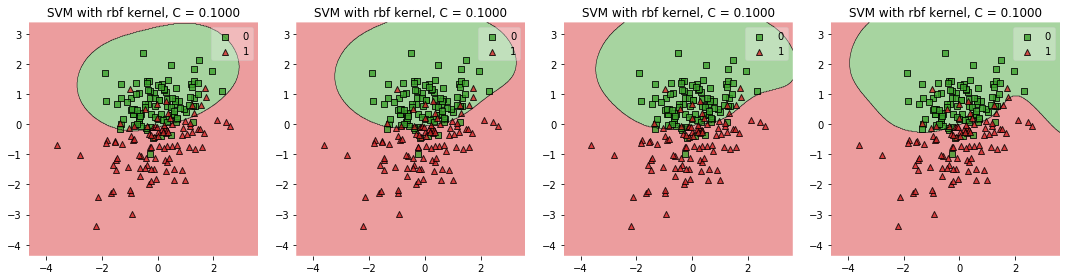

In [96]:
plt.figure(figsize=(15,4))
for i,v in enumerate(C_list):
    clf=SVC(C=v)
    clf.fit(X,y)
    plt.subplot(1,len(C_list),i+1)
    plot_decision_regions(X,y,clf,colors='#3ca02c,#d62728')
    plt.title("SVM with rbf kernel, C = {:.4f}".format(C))
plt.tight_layout()
plt.show()

### 1.2.2 SVM 高斯核函数参数2: gamma

- gamma是选择RBF函数作为kernel后，该函数自带的一个参数
- 隐含地决定了数据映射到新的特征空间后的分布
- gamma越大，单个样本对整个分类超平面的影响比较大，整个模型的支持向量也会多， 过拟合
- gamma值越小，单个样本对整个分类超平面的影响比较小，不容易被选择为支持向量，容易欠拟合

$$
k(x_1,x_2) = e^{-\frac{|x_1-x_2|^2}{2\sigma^2}} = e^{-\gamma (x_1-x_2)^2}
$$ 

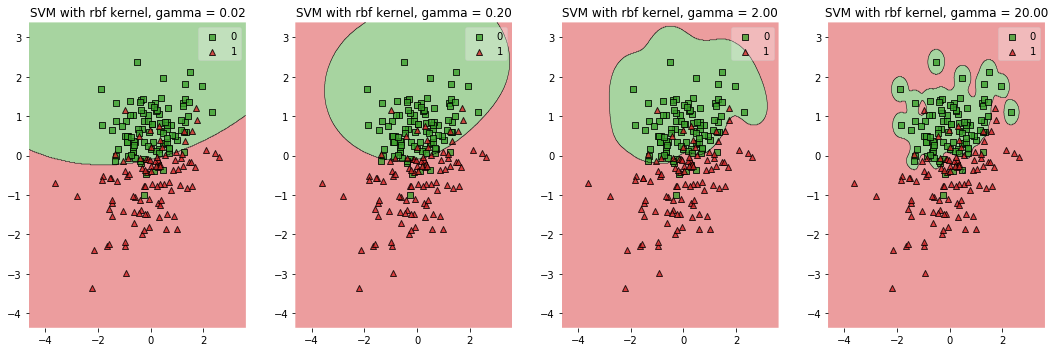

In [98]:
plt.figure(figsize = (15, 5))
for j,gamma in enumerate(gamma_list):
    clf = SVC(gamma = gamma, C = 1.0)
    clf.fit(X, y)
    plt.subplot(1, len(C_list), j + 1)
    plot_decision_regions(X, y, clf = clf, colors='#3ca02c,#d62728')
    plt.title("SVM with rbf kernel, gamma = {:.2f}".format(gamma))
plt.tight_layout()
plt.show()

## 1.3 对比不同的核函数

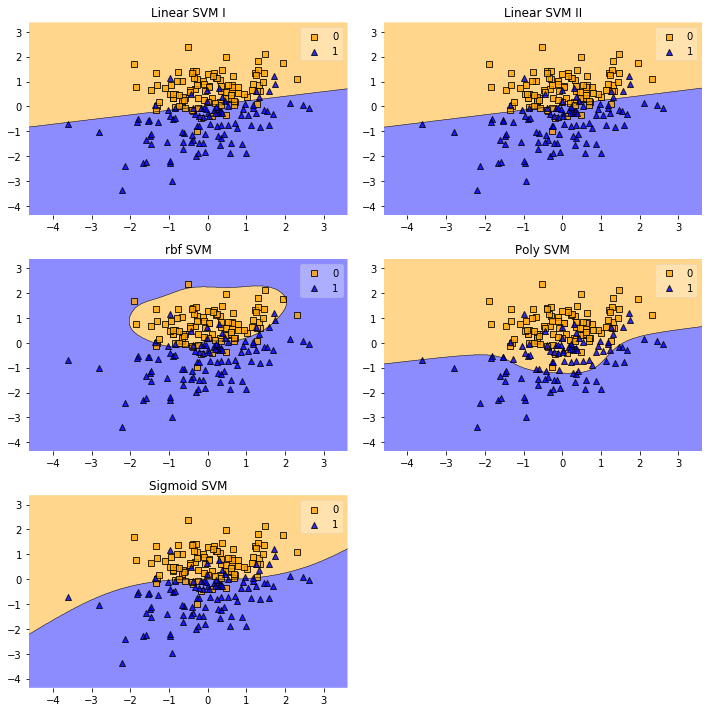

In [117]:
models = {
            "Linear SVM I":SVC(kernel = "linear", C = C), 
            "Linear SVM II":sk.svm.LinearSVC(C = C),
            "rbf SVM":SVC(kernel = "rbf", gamma = 2, C = C), # or SVC(gamma = 2, C = 1)
            "Poly SVM":SVC(kernel = "poly", degree = 5, C = C),
            "Sigmoid SVM":SVC(kernel = "sigmoid", C = C)
}

plt.figure(figsize=(10,10))
i=1
for key in models.keys():
    clf=models[key]
    clf.fit(X,y)
    plt.subplot(3,2,i)
    plot_decision_regions(X,y,clf,colors='orange,blue')
    plt.title(key,fontsize=12)
    i+=1

plt.tight_layout()
plt.show()

# 2. 多分类：multiclass classficiation

  - OVO
  - OVR

In [ ]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

In [118]:
make_blobs?

In [156]:
X2, Y2 = make_blobs(n_samples=200, n_features = 2, centers =5, random_state=1,cluster_std = 1)

In [157]:
X2.shape,np.unique(Y2)

((200, 2), array([0, 1, 2, 3, 4]))

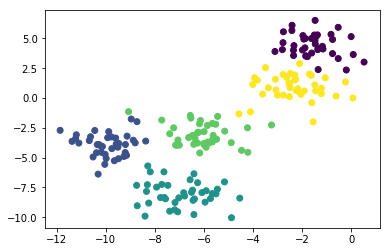

In [158]:
plt.scatter(X2[:,0],X2[:,1],c=Y2)
plt.show()

In [160]:
rbf_ovr=SVC(decision_function_shape='ovr')
#rbf_ovo = OneVsOneClassifier(SVC(kernel = "rbf"))
rbf_ovo=SVC(decision_function_shape='ovo')
linear_ovr=SVC(kernel='linear',decision_function_shape='ovr')
linear_ovo = SVC(kernel = 'linear', decision_function_shape = "ovo")

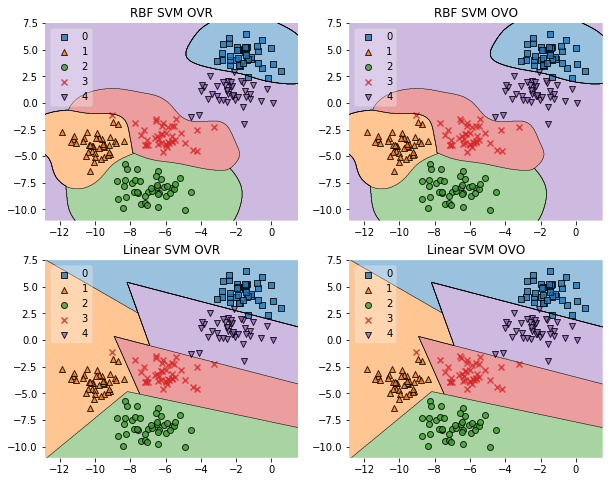

In [163]:
fig = plt.figure(figsize=(10, 8))

clfs = [rbf_ovr, rbf_ovo, linear_ovr, linear_ovo]
names = ["RBF SVM OVR", "RBF SVM OVO", "Linear SVM OVR", "Linear SVM OVO"]

for i, (clf, clf_name) in enumerate(zip(clfs, names)):
    plt.subplot(2,2,i+1)
    clf.fit(X2, Y2)
    fig = plot_decision_regions(X=X2, y=Y2, clf=clf,legend=2)
    plt.title(clf_name)
plt.show()

# 3. SVR: 支持向量回归

In [164]:
from sklearn.svm import SVR

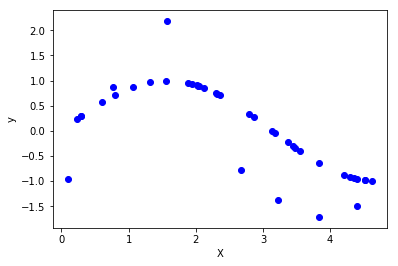

In [186]:
# 数据
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# 人为增加一些噪声
y[::5] += 3 * (0.5 - np.random.rand(8))
plt.scatter(X,y,c='b')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

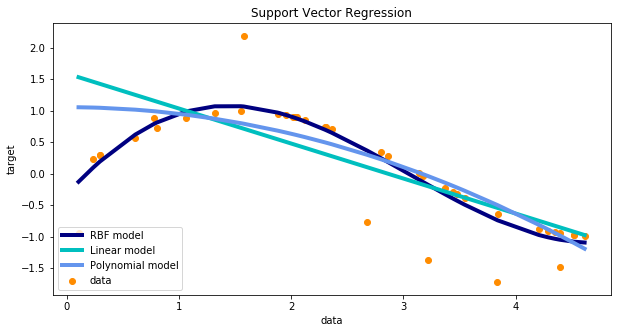

In [189]:
C = 1e3
svr_rbf = SVR(kernel='rbf', C = C, gamma = 0.1)
svr_lin = SVR(kernel='linear', C = C)
svr_poly = SVR(kernel='poly', C = C, degree = 2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

lw = 4
plt.figure(figsize = (10,5))
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', lw = lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw = lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend(loc = 'lower left')
plt.show()